In [1]:
#installation
#on va installer Jyquickhelper
pip install jyquickhelper

SyntaxError: ignored

In [ ]:
!pip install grid2op[optional]  # for use with google colab (grid2Op is not installed by default)

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
#Installons ensae-teaching-cs qui est une bibliothèque qui contient les données sur lesquelles on va travailler
!pip install ensae-teaching-cs

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Données

In [7]:
from ensae_teaching_cs.data import generate_sells

In [8]:
import pandas as pd


In [10]:
#creons notre data frame
df = pd.DataFrame(generate_sells())
df.head()

,date,value
0,2020-04-19 08:22:07.320510,0.000000
1,2020-04-20 08:22:07.320510,0.004812
2,2020-04-21 08:22:07.320510,0.005143
3,2020-04-22 08:22:07.320510,0.004775
4,2020-04-23 08:22:07.320510,0.007011


In [11]:
len(df)

731

#premier graphique

Text(0.5, 1.0, "chiffre d'affaire sur deux ans")

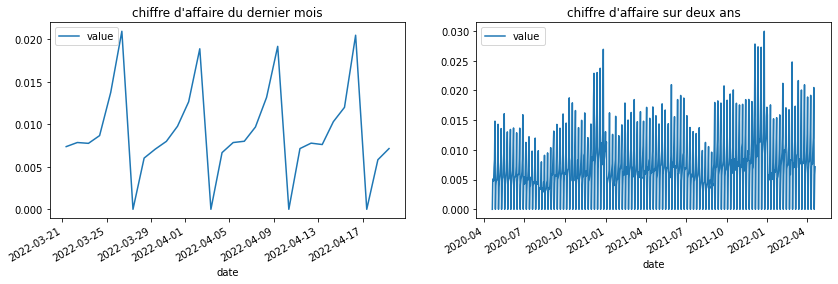

In [16]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
df.iloc[-30:].set_index('date').plot(ax=ax[0]) # les 30 dernière données enrégistrées
df.set_index('date').plot(ax=ax[1]) # le reste
ax[0].set_title("chiffre d'affaire du dernier mois")
ax[1].set_title("chiffre d'affaire sur deux ans")


## Tendance/trend

In [18]:
!pip install statsmodels

In [19]:
from statsmodels.tsa.tsatools import detrend
#on va voir si nos données ont une tendance c'est à dire voir s'ils sont en croissance ou en décroissance


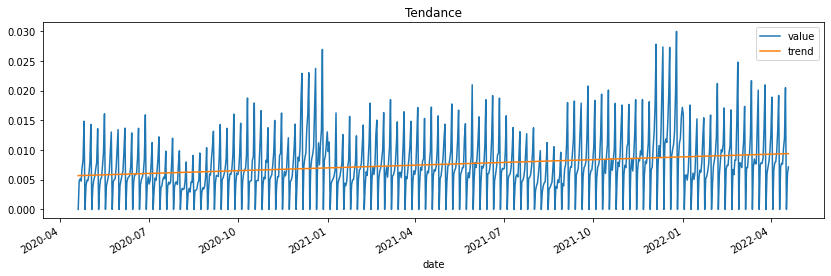

In [23]:
notrend = detrend(df.value, order = 1)
df["notrend"]=notrend
df["trend"]= df["value"]- notrend
ax = df.plot(x = 'date',y =['value', 'trend'],figsize =(14,4))
ax.set_title('Tendance')
plt.show()

## Autocorrelation

In [27]:
from statsmodels.tsa.stattools import acf
cor = acf(df.value)
print(cor)

[ 1.          0.03396454 -0.05523306 -0.02348521 -0.02625515 -0.06131289
  0.01587     0.92555823  0.01158294 -0.07223346 -0.04198725 -0.04525059
 -0.08000547 -0.00825463  0.89358544 -0.01133483 -0.09347135 -0.06262784
 -0.06551663 -0.10194708 -0.02823538  0.85355509 -0.03209081 -0.11008111
 -0.0813759  -0.08531589 -0.12006373 -0.04900205  0.80660001 -0.05779815
 -0.12856851 -0.10253194 -0.10183024 -0.13425235 -0.0611238   0.78869106
 -0.05626062 -0.12594004 -0.09903368 -0.09954343 -0.13255892]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


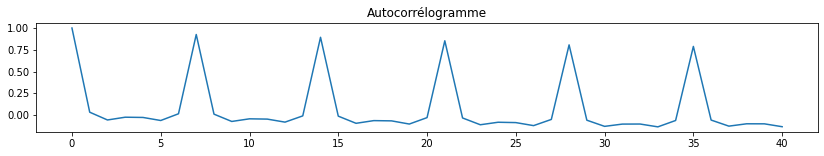

In [28]:
# Autocorrélogramme
fig, ax = plt.subplots(1,1, figsize = (14,2))
ax.plot(cor)
ax.set_title("Autocorrélogramme")
plt.show()

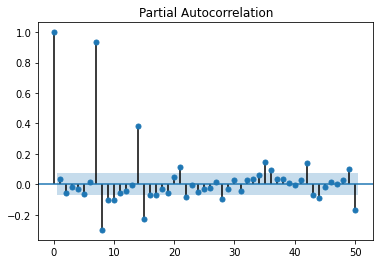

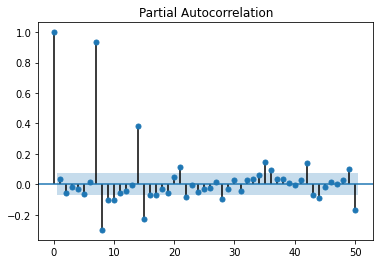

In [29]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.value, lags= 50)

In [30]:
df["weekday"]= df.date.dt.weekday
df.head()

,date,value,notrend,trend,weekday
0,2020-04-19 08:22:07.320510,0.000000,-0.005688,0.005688,6
1,2020-04-20 08:22:07.320510,0.004812,-0.000881,0.005693,0
2,2020-04-21 08:22:07.320510,0.005143,-0.000555,0.005698,1
3,2020-04-22 08:22:07.320510,0.004775,-0.000928,0.005703,2
4,2020-04-23 08:22:07.320510,0.007011,0.001303,0.005708,3


In [32]:
#vue que les dimanche ont une productivité = o, on retire toutes les lignes du dimanche et on stocque le reste dans un nouveau data frame
df_nosunday = df[df.weekday !=6]
df_nosunday.head(10)

,date,value,notrend,trend,weekday
1,2020-04-20 08:22:07.320510,0.004812,-0.000881,0.005693,0
2,2020-04-21 08:22:07.320510,0.005143,-0.000555,0.005698,1
3,2020-04-22 08:22:07.320510,0.004775,-0.000928,0.005703,2
4,2020-04-23 08:22:07.320510,0.007011,0.001303,0.005708,3
5,2020-04-24 08:22:07.320510,0.008356,0.002643,0.005713,4
6,2020-04-25 08:22:07.320510,0.014837,0.009118,0.005719,5
8,2020-04-27 08:22:07.320510,0.003981,-0.001747,0.005729,0
9,2020-04-28 08:22:07.320510,0.004900,-0.000833,0.005734,1
10,2020-04-29 08:22:07.320510,0.004843,-0.000896,0.005739,2
11,2020-04-30 08:22:07.320510,0.005947,0.000203,0.005744,3


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


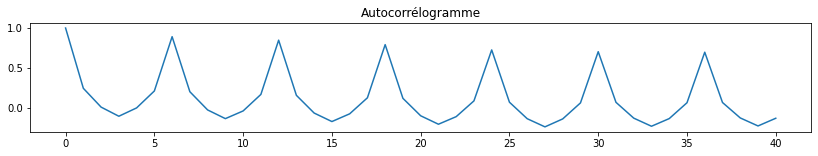

In [33]:
fig, ax = plt.subplots(1,1, figsize = (14,2))
cor = acf(df_nosunday.value)
ax.plot(cor)
ax.set_title("Autocorrélogramme")
plt.show()

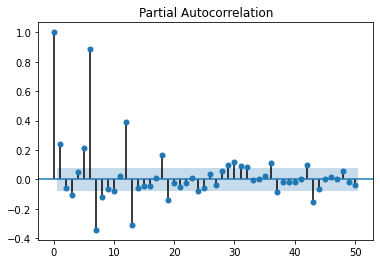

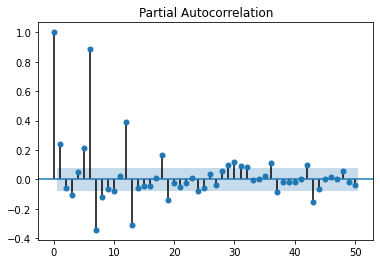

In [34]:
#Affichons la corrélation partielle du nouveau dataframe
plot_pacf(df_nosunday.value, lags= 50)

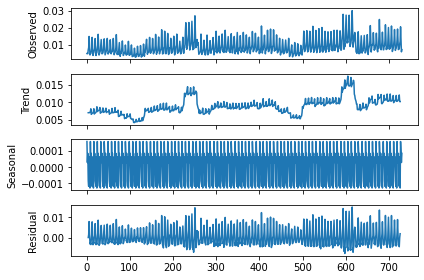

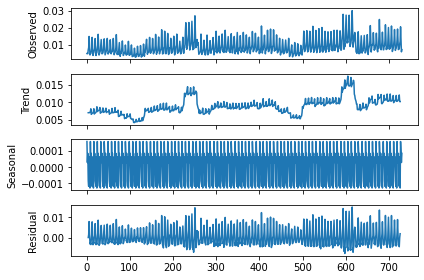

In [35]:
#Décomposons la serie en tendance + saisonalité
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_nosunday.value, freq = 7) # pour afficher par semaine (freq = 7)
res.plot()

Text(0.5, 1.0, 'saisonalité')

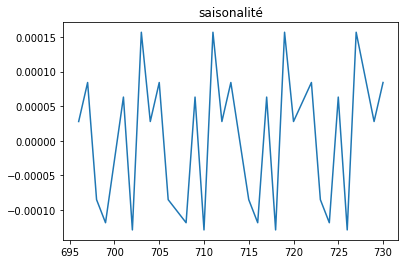

In [38]:
# Affichons la saisonalité pour le dernier mois
plt.plot(res.seasonal[-30:])
plt.title("saisonalité")

## Prédiction

In [39]:
#les modèles Ar, ARMA, ARIMA se concentrent sur une serie à une dimension
# En Machile Learning il y a la série et plein d'infos. On construit une matrice avec des series décalés

from statsmodels.tsa.tsatools import lagmat # qui va positionner nos donner en terme de 8 jours
lag = 8
x = lagmat(df_nosunday["value"], lag)
lagged = df_nosunday.copy()

for c in range(1, lag+1):
  lagged["lag%d" %c]=x[:, c-1] 
lagged.tail()

,date,value,notrend,trend,weekday,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
725,2022-04-14 08:22:07.320510,0.010315,0.000948,0.009367,3,0.007625,0.007789,0.007149,0.019184,0.013176,0.009690,0.008012,0.007859
726,2022-04-15 08:22:07.320510,0.012003,0.002631,0.009372,4,0.010315,0.007625,0.007789,0.007149,0.019184,0.013176,0.009690,0.008012
727,2022-04-16 08:22:07.320510,0.020494,0.011117,0.009377,5,0.012003,0.010315,0.007625,0.007789,0.007149,0.019184,0.013176,0.009690
729,2022-04-18 08:22:07.320510,0.005834,-0.003553,0.009387,0,0.020494,0.012003,0.010315,0.007625,0.007789,0.007149,0.019184,0.013176
730,2022-04-19 08:22:07.320510,0.007150,-0.002242,0.009392,1,0.005834,0.020494,0.012003,0.010315,0.007625,0.007789,0.007149,0.019184


In [40]:
# on ajoute la colonne weekday
lagged["weekday"]= lagged.date.dt.weekday

In [41]:
# On va donc supprimer les valeurs qui ne nous servirons pas pour la prédiction
x = lagged.drop(["date", "value","notrend", "trend"], axis = 1)
y = lagged["value"] # valeurs à prédire

In [42]:
x

,weekday,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0.004812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2,0.005143,0.004812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3,0.004775,0.005143,0.004812,0.000000,0.000000,0.000000,0.000000,0.000000
5,4,0.007011,0.004775,0.005143,0.004812,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
725,3,0.007625,0.007789,0.007149,0.019184,0.013176,0.009690,0.008012,0.007859
726,4,0.010315,0.007625,0.007789,0.007149,0.019184,0.013176,0.009690,0.008012
727,5,0.012003,0.010315,0.007625,0.007789,0.007149,0.019184,0.013176,0.009690
729,0,0.020494,0.012003,0.010315,0.007625,0.007789,0.007149,0.019184,0.013176


In [43]:
# Modèle de prédiction
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(x,y)

LinearRegression()

In [44]:
# calculons le r2 score pour vérifier la pertinance de notre algorithme
from sklearn.metrics import r2_score
r2_score(y, clr.predict(x))

0.8709345182937587

In [ ]:
#tester votre algorithm de ML 
# Par exemple RandomForest
# DecisionTree
# Lasso Regression
# Support Vector Regression